## Importing essentials


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Importing the dataset

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# check if there is any missing values in our df
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**no missing values**

In [4]:
# create features and target
X = df.iloc[:, 3:-1].values # we set X values from column 4 to one before the last
y = df.iloc[:, -1].values

## Encoding non-numeric values

In [5]:
# check one sample of our data
X[1]

array([608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

#### Label encoding the gender column:
> gender column index is `2`

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

#### Now Hot encoding the geography column:
> geography column index is `1`

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
X[1]

array([0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)

## Spliting dataset between Train/Test sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=101,
                                                    test_size=0.15)

## Feature scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building our NN model
* units = number of neurons (nodes) in each layer
* using ReLU as activation function in hidden layers
* using Sigmoid as we are working with a classification problem


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
266/266 [==============================] - 1s 2ms/step - loss: 0.5623 - accuracy: 0.7518
Epoch 2/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4611 - accuracy: 0.7979
Epoch 3/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8066
Epoch 4/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8142
Epoch 5/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4219 - accuracy: 0.8213
Epoch 6/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4182 - accuracy: 0.8221
Epoch 7/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4145 - accuracy: 0.8244
Epoch 8/50
266/266 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.8279
Epoch 9/50
266/266 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8308
Epoch 10/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8426

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251 (1004.00 Byte)
Trainable params: 251 (1004.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Evaluating our model

#### Making confusion matrix

In [15]:
y_pred = model.predict(X_test)

47/47 [==============================] - 0s 932us/step


In [16]:
y_pred

array([[0.02661623],
       [0.0234994 ],
       [0.38979343],
       ...,
       [0.02721075],
       [0.47393134],
       [0.1709676 ]], dtype=float32)

In [17]:
y_pred = y_pred > 0.5

In [18]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[1120,   65],
       [ 147,  168]])

In [20]:
accuracy_score(y_test, y_pred)

0.8586666666666667

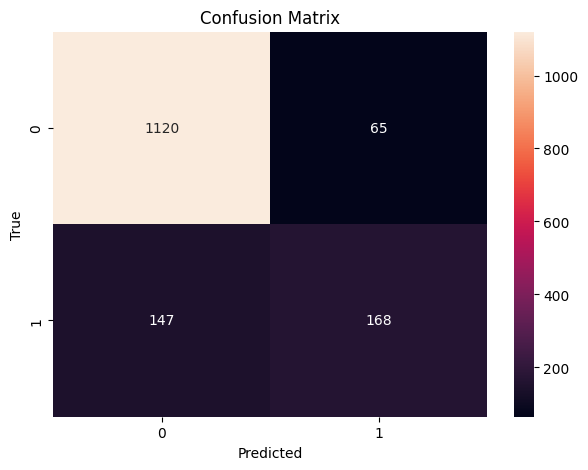

In [21]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
